In [1]:
import pandas_datareader as wb, pandas as pd, datetime, matplotlib.pyplot as plt, numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2023, 5, 17)
df_null = wb.DataReader("KOSPI", "naver", start, end)
df = df_null['Close'].dropna().astype('float')

### Nonlinar Models and Their Applications

Apart from the development of various nonlinear models, there is substantial interest in studying test statistics that can discriminate linear series from nonlinear ones. Both parametric and nonparametric tests are available. Most parametric tests employ either the Lagrange multiplier or likelihood ratio statistics. Nonparametric tests depend on either higher order spectra of $x_t$ or the concept of dimension correlation developed for chaotic time series.

#### 1. Nonlinear Models

Our goal here is to introduce some nonlinear models that are applicable to financial time series.

**1.1 Bilinear Model**

As such, a natural extension to nonlinearity is to employ the second-order terms in the expansion to improve the approximation. This is the basic idea of bilinear models, which can be defined as

$$x_t = c + \sum_{i=1}^p ϕ_i x_{t-i} - \sum_{j=i}^q θ_j a_{t-j} + \sum_{i=1}^m \sum_{j=1}^s β_{ij}x_{t-i}a_{t-j} + a_t$$

where $p,q,m$ and $s$ are nonnegative integers.

For example, consider the model

$$x_t = μ + ∑_{i=1}^s β_i a_{t-i}a_t + a_t$$

where $\{a_t\}$ is a white noise series. The first two conditional moments of $x_t$ are

$$E(x_t|F_{t-1}) = μ,~~~~~~ \mathrm{Var}(x_t|F_{t-1}) = \Big(1 + \sum_{i=1}^s \beta_i a_{t-i}\Big)^2 σ_a^2$$

which are similar to that of the RCA or CHARMA model of Chapter 3.

<Figure size 1000x800 with 0 Axes>

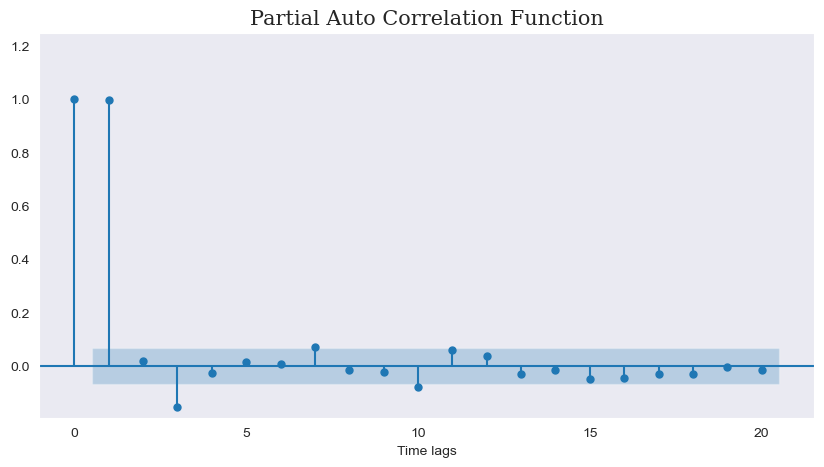

In [3]:
import statsmodels.tsa.stattools as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

sns.set_style("dark")
plt.figure(figsize = (10,8))
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(np.log(df), auto_ylims = True, lags = 20, title = 'PACF of KOSPI log Index', ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Partial Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

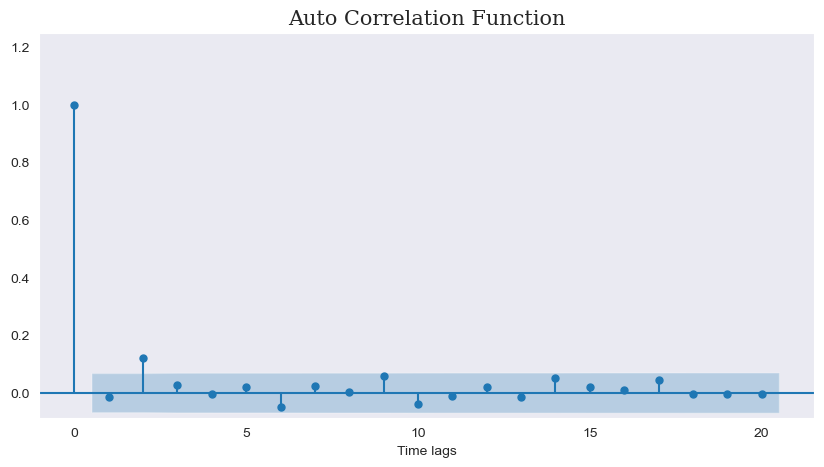

In [16]:
df_diff = (df - df.shift(1)) / df
df_diff = df_diff.dropna()

sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_diff, auto_ylims = True, lags = 20, title = 'ACF of KOSPI return' , ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

consider AR(3) model in KOSPI return series

In [23]:
import pandas as pd
import statsmodels.api as sm

model = sm.tsa.ARIMA(np.log(df), order = (3,0,0), trend = 'c').fit(method = 'innovations_mle')
model.summary()

/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  835
Model:                 ARIMA(3, 0, 0)   Log Likelihood                2430.033
Date:                Sun, 25 Jun 2023   AIC                          -4850.067
Time:                        19:58:19   BIC                          -4826.430
Sample:                             0   HQIC                         -4841.005
                                - 835                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8184      0.097     80.513      0.000       7.628       8.009
ar.L1          0.9825      0.015     65.439      0.000       0.953       1.012
ar.L2          0.1327      0.022      6.129      0.000       0.090       0.175
ar.L3         -0.1194      0.018     -6.573      0.000      -0.155      -0.084
sigma2         0.0002   4.43e-06     39.000      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1048.57
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
bilinear = pd.DataFrame(np.log(df))
bilinear['1'] = np.log(df).shift(1)
bilinear['2'] = np.log(df).shift(2)
bilinear['3'] = np.log(df).shift(3)
bilinear.columns = ['log_price','ar_1','ar_2','ar_3']
bilinear = bilinear.dropna()

In [38]:
X = bilinear.iloc[:, 1:]
y = bilinear.iloc[:, 0]
X = sm.add_constant(X)

model = sm.OLS(y, X)
ARModel = model.fit()

ARModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.997e+04
Date:                Sun, 25 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:07:59   Log-Likelihood:                 2423.2
No. Observations:                 832   AIC:                            -4838.
Df Residuals:                     828   BIC:                            -4819.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0354      0.023      1.564      0.118      -0.009       0.080
ar_1           0.9823      0.034     28.477      0.000       0.915       1.050
ar_2           0.1328      0.048      2.750      0.006       0.038       0.228
ar_3          -0.1196      0.034     -3.469      0.001      -0.187      -0.052
==============================================================================
Omnibus:                      111.035   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1045.039
Skew:                          -0.188   Prob(JB):                    1.18e-227
Kurtosis:                       8.478   Cond. No.                     1.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
a = ARModel.resid
bilinear['noise'] = a
bilinear['noise_1'] = a * a.shift(1)
bilinear['noise_2'] = a * a.shift(2)
bilinear['noise_3'] = a * a.shift(3)
bilinear = bilinear.dropna()
bilinear

,log_price,ar_1,ar_2,ar_3,noise,noise_1,noise_2,noise_3
Date,,,,,,,,
2020-01-15,7.710196,7.713731,7.709425,7.699113,-0.005485,-0.000014,-0.000042,-0.000053
2020-01-16,7.717818,7.710196,7.713731,7.709425,0.006270,-0.000034,0.000016,0.000048
2020-01-17,7.718939,7.717818,7.710196,7.713731,0.000888,0.000006,-0.000005,0.000002
2020-01-20,7.724288,7.718939,7.717818,7.710196,0.003701,0.000003,0.000023,-0.000020
2020-01-21,7.714093,7.724288,7.718939,7.717818,-0.010985,-0.000041,-0.000010,-0.000069
...,...,...,...,...,...,...,...,...
2023-05-11,7.820440,7.822649,7.828062,7.829316,-0.002417,0.000015,0.000003,-0.000014
2023-05-12,7.814165,7.820440,7.822649,7.828062,-0.005952,0.000014,0.000037,0.000008
2023-05-15,7.815752,7.814165,7.820440,7.822649,0.001444,-0.000009,-0.000003,-0.000009


In [41]:
X = bilinear.iloc[:, 1:]
y = bilinear.iloc[:, 0]
X = sm.add_constant(X)

model = sm.OLS(y, X)
BiLinear = model.fit()

print(BiLinear.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.035e+28
Date:                Sun, 25 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:08:42   Log-Likelihood:                 25585.
No. Observations:                 826   AIC:                        -5.115e+04
Df Residuals:                     818   BIC:                        -5.112e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0354    1.5e-14   2.36e+12      0.0

KOSPI index에 대해 Bilinear Time Series Model 적합화 결과 다음과 같은 모델이 나왔다

$$r_t = 0.0354 + 0.9823r_{t-1} + 0.1328 r_{t-2} - 0.1196r_{t-3} + (1 + 5.684 \times 10^{-13} a_{t-1} + 1.137 \times 10^{-12}a_{t-2} - 1.45 \times 10^{-12}a_{t-3})a_t$$

In [44]:
ARModel.resid

Date
2020-01-07    0.008307
2020-01-08   -0.010797
2020-01-09    0.013970
2020-01-10    0.009752
2020-01-13    0.007655
                ...   
2023-05-11   -0.002417
2023-05-12   -0.005952
2023-05-15    0.001444
2023-05-16    0.000813
2023-05-17    0.005297
Length: 832, dtype: float64

In [45]:
BiLinear.resid

Date
2020-01-15    8.881784e-15
2020-01-16    8.881784e-15
2020-01-17    8.881784e-15
2020-01-20    1.065814e-14
2020-01-21    8.881784e-15
                  ...     
2023-05-11    7.993606e-15
2023-05-12    7.993606e-15
2023-05-15    7.993606e-15
2023-05-16    9.769963e-15
2023-05-17    7.993606e-15
Length: 826, dtype: float64

모델 잔차 확인 결과 Bilinear Model이 더 작은 것을 확인할 수 있다